<a href="https://colab.research.google.com/github/Aleena-Mishra-10/first_01/blob/master/Predicting_Insurance_Premium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Predicting Insurance Premiums**


Our simple dataset contains a few attributes for each person such as
Age, Sex, BMI, Children, Smoker, Region and their charges


**Aim**

To use this info to predict charges for new customers




In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/insurance.csv"
insurance=pd.read_csv(file_name)

In [0]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [0]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [0]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [0]:
print("\nRows:",insurance.shape[0])
print("\nColumns:",insurance.shape[1])
print("\nFeatures:\n",insurance.columns.tolist())
print("\nMissing values:\n",insurance.isnull().sum())
print("\nUnique Values:\n",insurance.nunique())


Rows: 1338

Columns: 7

Features:
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Unique Values:
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [0]:
corr=insurance.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Data Visualization

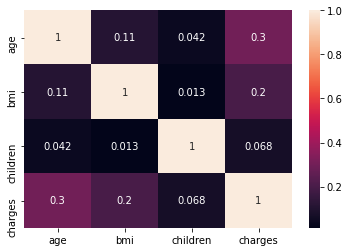

In [0]:
sns.heatmap(corr,annot=True)

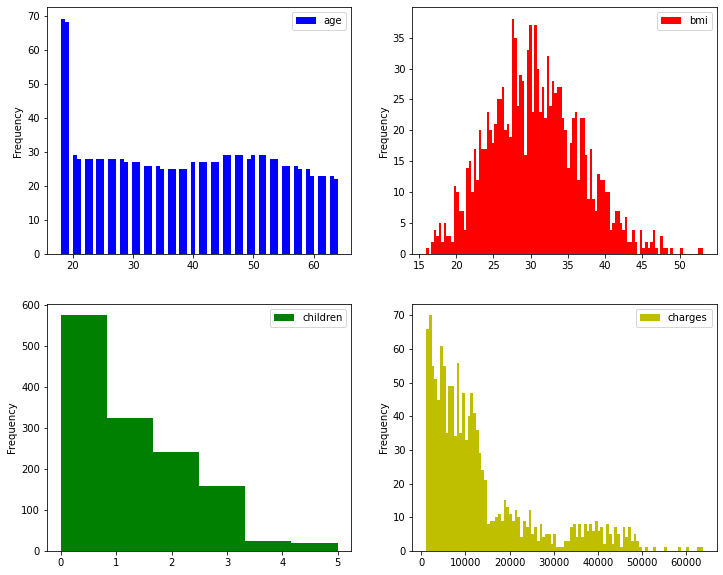

In [0]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,10))
insurance.plot(kind="hist",y="age",bins=70,color='b',ax=axes[0][0])
insurance.plot(kind="hist",y="bmi",bins=110,color='r',ax=axes[0][1])
insurance.plot(kind="hist",y="children",bins=6,color='g',ax=axes[1][0])
insurance.plot(kind="hist",y='charges',bins=100,color='y',ax=axes[1][1])

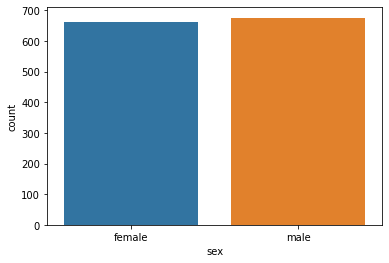

In [0]:
sns.countplot(x='sex',data=insurance)

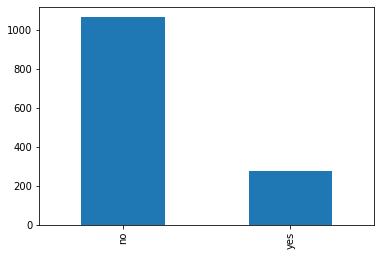

In [0]:
insurance['smoker'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'children vs charges')

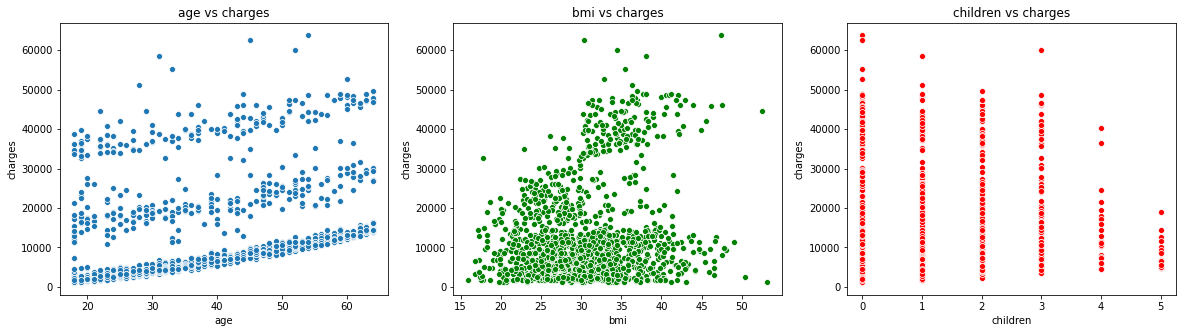

In [0]:
fig , ax =plt.subplots(nrows=1,ncols=3,figsize=(20,5))
sns.scatterplot(x='age',y='charges' ,ax=ax[0], data=insurance).set_title('age vs charges')
sns.scatterplot(x='bmi' ,y='charges' , color='g',ax=ax[1],data=insurance).set_title('bmi vs charges')
sns.scatterplot(x='children' , y='charges' , color='r',ax=ax[2],data=insurance).set_title('children vs charges')

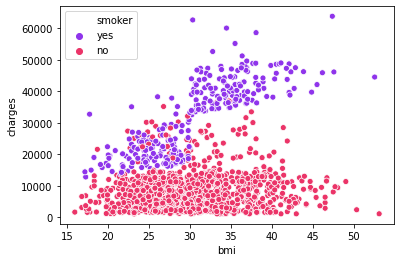

In [0]:
pal=['#8f34eb','#eb3468']
sns.scatterplot(x='bmi',y='charges',data=insurance,hue='smoker',palette=pal)

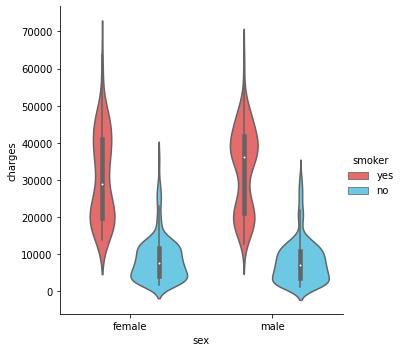

In [0]:
pal = ["#FA5858", "#58D3F7"]
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=insurance, palette = pal)

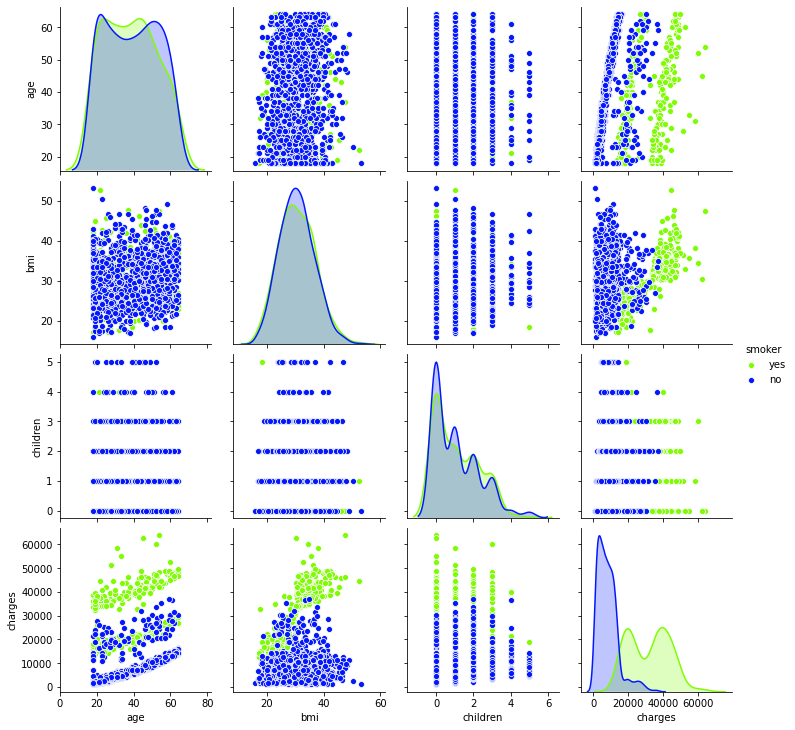

In [0]:
pal=['#7ffc03','#0318fc']
sns.pairplot(data=insurance,hue='smoker',palette=pal)

Preparing Data for Machine Learning Algorithms

In [0]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [0]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [0]:
df=insurance.drop(['region'],axis=1)
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [0]:
df['sex']=df['sex'].map(lambda s:1 if s=='female' else 0)
df['smoker']=df['smoker'].map(lambda s:1 if s=='yes' else 0)
df.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


In [0]:
x=df.drop(['charges'],axis=1)
y=df['charges']

In [0]:
x.head()

,age,sex,bmi,children,smoker
0,19,1,27.900,0,1
1,18,0,33.770,1,0
2,28,0,33.000,3,0
3,33,0,22.705,0,0
4,32,0,28.880,0,0


In [0]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Modeling our Data

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [0]:
pd.DataFrame(x_train).head()

,0,1,2,3,4
0,-0.148533,-1.015067,0.545305,2.413948,1.971255
1,-1.497808,-1.015067,0.598672,-0.892195,-0.507291
2,-1.142736,0.985157,0.960921,0.760876,1.971255
3,-0.503605,-1.015067,0.723195,0.760876,-0.507291
4,1.342771,0.985157,0.269575,-0.065659,-0.507291


In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_features=PolynomialFeatures(degree=3)

x_train_poly = polynomial_features.fit_transform(x_train)  
x_test_poly = polynomial_features.fit_transform(x_test)

polynomial_reg = LinearRegression(fit_intercept=False) 
polynomial_reg.fit(x_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [0]:
from sklearn.tree import DecisionTreeRegressor  

decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  
decision_tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=13, splitter='best')

In [0]:
from sklearn.ensemble import RandomForestRegressor  

random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)  
random_forest_reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=13, verbose=0, warm_start=False)

In [0]:
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import r2_score  
from sklearn.metrics import mean_squared_error  
from math import sqrt

Evaluating Polynomial Regression Model

In [0]:
y_pred_PR_train=polynomial_reg.predict(x_train_poly)
y_pred_PR_test=polynomial_reg.predict(x_test_poly)
accuracy_PR_train=r2_score(y_train,y_pred_PR_train)
print(" Training Accuracy:",accuracy_PR_train)
accuracy_PR_test=r2_score(y_test,y_pred_PR_test)
print("Testing Accuracy:",accuracy_PR_test)
RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)
RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)
y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(x), y, cv=10)
accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 10-Fold Cross Predicted Polynomial Regression Model: ", accuracy_cv_PR)

 Training Accuracy: 0.8397019769037197
Testing Accuracy: 0.8784171612900752
RMSE for Training Data:  4793.882611234492
RMSE for Testing Data:  4398.576194966663
Accuracy for 10-Fold Cross Predicted Polynomial Regression Model:  0.839107291768179


Evaluating Decision Tree Regression Model

In [0]:
y_pred_DT_train=decision_tree_reg.predict(x_train)
y_pred_DT_test=decision_tree_reg.predict(x_test)
accuracy_DT_train=r2_score(y_train,y_pred_DT_train)
print("Training Accuracy:",accuracy_DT_train)
accuracy_DT_test=r2_score(y_test,y_pred_DT_test)
print("Testing Accuracy:",accuracy_DT_test)
RMSE_DT_train = sqrt(mean_squared_error(y_train, y_pred_DT_train))
print("RMSE for Training Data: ", RMSE_DT_train)
RMSE_DT_test = sqrt(mean_squared_error(y_test, y_pred_DT_test))
print("RMSE for Testing Data: ", RMSE_DT_test)
y_pred_cv_DT = cross_val_predict(decision_tree_reg, x, y, cv=10)
accuracy_cv_DT = r2_score(y, y_pred_cv_DT)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DT)

Training Accuracy: 0.8730646141968887
Testing Accuracy: 0.8360180419526675
RMSE for Training Data:  4265.939241704519
RMSE for Testing Data:  5108.271998002886
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.8494241031595924


Evaluating Random Forest Regression Model

In [0]:
y_pred_RF_train=random_forest_reg.predict(x_train)
y_pred_RF_test=random_forest_reg.predict(x_test)
accuracy_RF_train=r2_score(y_train,y_pred_DT_train)
print("Training Accuracy:",accuracy_RF_train)
accuracy_RF_test=r2_score(y_test,y_pred_RF_test)
print("Testing Accuracy:",accuracy_RF_test)
RMSE_RF_train = sqrt(mean_squared_error(y_train, y_pred_RF_train))
print("RMSE for Training Data: ", RMSE_DT_train)
RMSE_RF_test = sqrt(mean_squared_error(y_test, y_pred_RF_test))
print("RMSE for Testing Data: ", RMSE_RF_test)
y_pred_cv_RF = cross_val_predict(random_forest_reg, x, y, cv=10)
accuracy_cv_RF = r2_score(y, y_pred_cv_RF)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_RF)

Training Accuracy: 0.8730646141968887
Testing Accuracy: 0.8945381521456265
RMSE for Training Data:  4265.939241704519
RMSE for Testing Data:  4096.601014925447
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.8573836617506323


In [0]:
training_accuracies=[accuracy_PR_train,accuracy_DT_train,accuracy_RF_train]
testing_accuracies=[accuracy_PR_test,accuracy_DT_test,accuracy_RF_test]
training_RMSE=[RMSE_PR_train,RMSE_DT_train,RMSE_RF_train]
testing_RMSE=[RMSE_PR_test,RMSE_DT_test,RMSE_RF_test]
cv_accuracies=[accuracy_cv_PR,accuracy_cv_DT,accuracy_cv_RF]
table_data = { "Training Accuracy": training_accuracies, "Testing Accuracy": testing_accuracies, 
              "Training RMSE": training_RMSE, "Testing RMSE": testing_RMSE, "10-Fold Score": cv_accuracies}
model_names = [ "Polynomial Regression", "Decision Tree Regression", "Random Forest Regression"]

table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe

,Training Accuracy,Testing Accuracy,Training RMSE,Testing RMSE,10-Fold Score
Polynomial Regression,0.839702,0.878417,4793.882611,5108.271998,0.839107
Decision Tree Regression,0.873065,0.836018,4265.939242,5108.271998,0.849424
Random Forest Regression,0.873065,0.894538,4122.696795,4096.601015,0.857384
